# Lab 1: Exercise Solutions

In [1]:
with open('../course/common.py') as fin:
    exec(fin.read())

In [2]:
with open('../course/matplotlibconf.py') as fin:
    exec(fin.read())

## Exercise 1

Let's practice a little bit with `numpy`:

- generate an array of zeros with `shape=(10, 10)`, call it `a`
- set every other element of `a` to 1, both along columns and rows, so that you obtain a nice checkerboard pattern of zeros and ones
- generate a second array to be the sequence from 5 included to 15 excluded, call it `b`
- multiply `a` times `b` in such a way that the first row of a is an alternation of zeros and fives, the second row is an alternation of zeros and sixes and so on. Call this new array `c`. To complete this part, you will have to reshape `b` as a column array
- calculate the `mean` and the `standard deviation` of `c` along rows and columns
- create a new array of `shape=(10, 5)` and fill it with the non-zero values of `c`, call it `d`
- add random Gaussian noise to `d`, centered in zero and with a standard deviation of 0.1, call this new array `e`

In [3]:
a = np.zeros((10, 10))

In [4]:
a[::2, ::2] = 1
a[1::2, 1::2] = 1

In [5]:
a

array([[1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 1., 0., 1., 0., 1.]])

In [6]:
b = np.arange(5, 15)

In [7]:
b

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [8]:
# c = a * b[:, None]
c = a * b.reshape((10, 1))

In [9]:
c

array([[ 5.,  0.,  5.,  0.,  5.,  0.,  5.,  0.,  5.,  0.],
       [ 0.,  6.,  0.,  6.,  0.,  6.,  0.,  6.,  0.,  6.],
       [ 7.,  0.,  7.,  0.,  7.,  0.,  7.,  0.,  7.,  0.],
       [ 0.,  8.,  0.,  8.,  0.,  8.,  0.,  8.,  0.,  8.],
       [ 9.,  0.,  9.,  0.,  9.,  0.,  9.,  0.,  9.,  0.],
       [ 0., 10.,  0., 10.,  0., 10.,  0., 10.,  0., 10.],
       [11.,  0., 11.,  0., 11.,  0., 11.,  0., 11.,  0.],
       [ 0., 12.,  0., 12.,  0., 12.,  0., 12.,  0., 12.],
       [13.,  0., 13.,  0., 13.,  0., 13.,  0., 13.,  0.],
       [ 0., 14.,  0., 14.,  0., 14.,  0., 14.,  0., 14.]])

In [10]:
c.mean(axis=0)

array([4.5, 5. , 4.5, 5. , 4.5, 5. , 4.5, 5. , 4.5, 5. ])

In [11]:
c.mean(axis=1)

array([2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ])

In [12]:
c.std(axis=0)

array([4.9244289 , 5.38516481, 4.9244289 , 5.38516481, 4.9244289 ,
       5.38516481, 4.9244289 , 5.38516481, 4.9244289 , 5.38516481])

In [13]:
c.std(axis=1)

array([2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. ])

In [14]:
d = c[c>0].reshape(10, 5)

In [15]:
d

array([[ 5.,  5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.,  7.],
       [ 8.,  8.,  8.,  8.,  8.],
       [ 9.,  9.,  9.,  9.,  9.],
       [10., 10., 10., 10., 10.],
       [11., 11., 11., 11., 11.],
       [12., 12., 12., 12., 12.],
       [13., 13., 13., 13., 13.],
       [14., 14., 14., 14., 14.]])

In [16]:
noise = np.random.normal(scale=0.1, size=(10, 5))

In [17]:
e = d + noise

## Exercise 2

Practice plotting with `matplotlib`:

- use `plt.imshow()` to display the array `a` as an image, does it look like a checkerboard?
- display `c`, `d` and `e` using the same function, change the colormap to grayscale
- plot `e` using a line plot, assigning each row to a different data series. This should produce a plot with noisy horizontal lines. You will need to transpose the array to obtain this.
- add a title, axes labels, legend and a couple of annotations

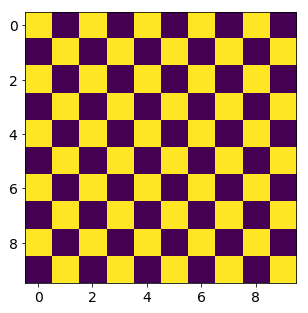

In [18]:
plt.imshow(a);

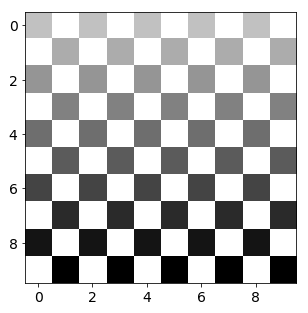

In [19]:
plt.imshow(c, cmap='Greys');

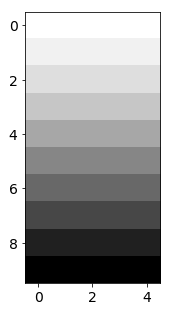

In [20]:
plt.imshow(d, cmap='Greys');

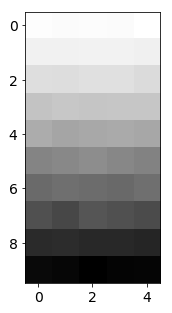

In [21]:
plt.imshow(e, cmap='Greys');

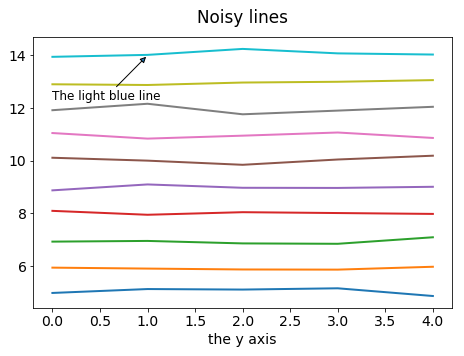

In [22]:
plt.plot(e.transpose())
plt.title("Noisy lines")
plt.xlabel("the x axis")
plt.xlabel("the y axis")
plt.annotate(xy=(1, 14), xytext=(0, 12.3),
             s="The light blue line",
             arrowprops={"arrowstyle": '-|>'},
             fontsize=12);

## Exercise 3

Reuse your code

Encapsulate the code that calculates the decision boundary in a nice function called `plot_decision_boundary` with the signature:

```python
def plot_decision_boundary(model, X, y):
    ....
```

In [23]:
def plot_decision_boundary(model, X, y):
    hticks = np.linspace(X.min()-0.1, X.max()+0.1, 101)
    vticks = np.linspace(X.min()-0.1, X.max()+0.1, 101)
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    c = model.predict(ab)
    cc = c.reshape(aa.shape)
    plt.figure(figsize=(7, 7))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.title("Blue circles and Red crosses");

## Exercise 4

Practice retraining the model on different data:

- use the functions `make_blobs` and `make_moons` from Scikit-Learn to generate new datasets with two classes
- plot the data to make sure you understand it
- re-train your model on each of these datasets
- display the decision boundary for each of these models

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [25]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [26]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(SGD(lr=0.5),
              'binary_crossentropy',
              metrics=['accuracy'])
model.fit(X, y, epochs=30, verbose=0);

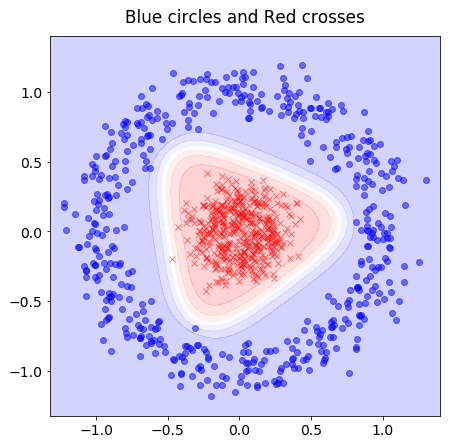

In [27]:
plot_decision_boundary(model, X, y)

In [28]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000,
                  centers=2,
                  random_state=0)


In [29]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(SGD(lr=0.5),
              'binary_crossentropy',
              metrics=['accuracy'])
model.fit(X, y, epochs=30, verbose=0);

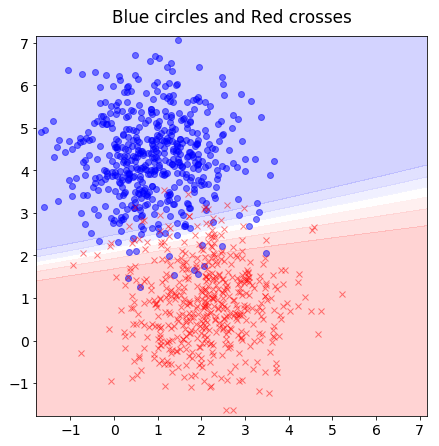

In [30]:
plot_decision_boundary(model, X, y)

In [31]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000,
                  noise=0.1,
                  random_state=0)

In [32]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(SGD(lr=0.5),
              'binary_crossentropy',
              metrics=['accuracy'])
model.fit(X, y, epochs=30, verbose=0);

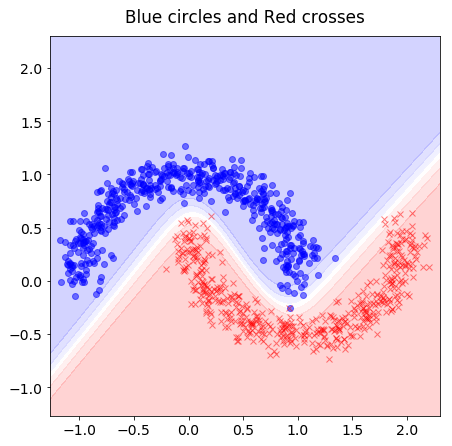

In [33]:
plot_decision_boundary(model, X, y)